In [6]:
import pandas as pd
import requests
pd.set_option('display.max_columns', None)
import time
import numpy as np
from nba_api.stats.endpoints import LeagueDashPlayerStats

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from nba_api.stats.endpoints import commonteamroster
import pandas as pd


1. Extract all 2019 to 2024 NBA Api data
2. Map Injury data player name to Mapped name data table.
3. Match injury data with NBA Api data.

### NBA Api Player Level Data.

In [23]:
def fetch_nba_season_stats(season):
    """
    Fetches NBA player statistics for both the regular season and playoffs for a given season.

    Parameters:
    - season (str): The NBA season in "YYYY-YY" format (e.g., "2023-24").

    Returns:
    - df_regular (DataFrame): Regular season player stats.
    - df_playoffs (DataFrame): Playoff player stats.
    """

    # Fetch regular season stats
    player_stats_regular = LeagueDashPlayerStats(season=season, season_type_all_star="Regular Season")
    df_regular = player_stats_regular.get_data_frames()[0]
    df_regular["Season Type"] = "Regular Season"

    # Fetch playoff stats
    player_stats_playoffs = LeagueDashPlayerStats(season=season, season_type_all_star="Playoffs")
    df_playoffs = player_stats_playoffs.get_data_frames()[0]
    df_playoffs["Season Type"] = "Playoffs"

    return df_regular, df_playoffs

from nba_api.stats.endpoints import LeagueDashPlayerStats

def fetch_nba_season_advanced_stats(season):
    """
    Fetches NBA player advanced statistics for both the regular season and playoffs for a given season.

    Parameters:
    - season (str): The NBA season in "YYYY-YY" format (e.g., "2023-24").

    Returns:
    - df_regular_adv (DataFrame): Regular season player advanced stats.
    - df_playoffs_adv (DataFrame): Playoff player advanced stats.
    """
    # Fetch regular season advanced stats
    player_stats_regular_adv = LeagueDashPlayerStats(
        season=season,
        season_type_all_star="Regular Season",
        measure_type_detailed_defense="Advanced"
    )
    df_regular_adv = player_stats_regular_adv.get_data_frames()[0]
    df_regular_adv["Season Type"] = "Regular Season"

    # Fetch playoff advanced stats
    player_stats_playoffs_adv = LeagueDashPlayerStats(
        season=season,
        season_type_all_star="Playoffs",
        measure_type_detailed_defense="Advanced"
    )
    df_playoffs_adv = player_stats_playoffs_adv.get_data_frames()[0]
    df_playoffs_adv["Season Type"] = "Playoffs"

    return df_regular_adv, df_playoffs_adv

In [24]:
# Basic Stats
season_years = {
    2023: "2023-24",
    2022: "2022-23",
    2021: "2021-22",
    2020: "2020-21",
    2019: "2019-20"
}

regular_season_dfs = []

for start_year, season_str in season_years.items():
    df_regular, df_playoffs = fetch_nba_season_stats(season_str)
    
    # Add 'season' column (use start year)
    df_regular['Season'] = start_year
    
    # Append to list for later merging
    regular_season_dfs.append(df_regular)

# Merge all regular season DataFrames
df_regular_all = pd.concat(regular_season_dfs, ignore_index=True)




In [25]:
# Advance Stats
advanced_season_dfs = []

for start_year, season_str in season_years.items():
    df_regular_adv, df_playoffs_adv = fetch_nba_season_advanced_stats(season_str)
    
    # Add 'Season' column
    df_regular_adv['Season'] = start_year
    
    # Append to list
    advanced_season_dfs.append(df_regular_adv)

# Merge all regular season advanced DataFrames
df_advanced_all = pd.concat(advanced_season_dfs, ignore_index=True)

# Merge on shared keys: PLAYER_ID, TEAM_ID, and Season
df_regular_all = pd.merge(
    df_regular_all,
    df_advanced_all,
    on=["PLAYER_ID", "TEAM_ID", "Season"],
    suffixes=('', '_adv'),
    how='left'
)

In [5]:
df_regular_all.head(1)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season Type,Season,PLAYER_NAME_adv,NICKNAME_adv,TEAM_ABBREVIATION_adv,AGE_adv,GP_adv,W_adv,L_adv,W_PCT_adv,MIN_adv,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_adv,FGA_adv,FGM_PG,FGA_PG,FG_PCT_adv,GP_RANK_adv,W_RANK_adv,L_RANK_adv,W_PCT_RANK_adv,MIN_RANK_adv,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_adv,FGA_RANK_adv,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_adv,Season Type_adv
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,23.0,42,27,15,0.643,310.9,54,121,0.446,13,50,0.26,15,23,0.652,14,36,50,20,14,10,3,8,22,13,136,18,251.0,0,0,245.0,341,231,168,105,410,378,373,303,346,338,428,382,374,445,389,407,408,414,394,386,428,211,148,415,385,192,400,257,38,405,Regular Season,2023,A.J. Lawson,A.J.,DAL,23.0,42,27,15,0.643,7.4,109.9,106.6,106.6,106.2,105.3,105.3,3.7,1.2,1.2,0.089,1.43,12.1,0.039,0.105,0.072,8.5,8.5,0.5,0.519,0.18,0.188,105.42,107.53,89.61,107.53,0.076,701,54,121,1.3,2.9,0.446,341,231,168,105,486,314,407,407,67,75,75,157,214,214,372,393,445,255,361,334,215,215,383,425,220,217,28,33,33,358,378,373,429,441,303,Regular Season


### Player Physical Stats

In [26]:
from nba_api.stats.endpoints import commonteamroster
import pandas as pd

# Example for one team and season – you’d loop over teams/seasons as needed.
team_id = 1610612747  # Example: Los Angeles Lakers
season = "2023-24"

# Retrieve roster data (this typically includes the position if available)
roster_response = commonteamroster.CommonTeamRoster(team_id=team_id, season=season)
roster_df = roster_response.get_data_frames()[0]

roster_df.head(1)

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610612747,2023,00,Jalen Hood-Schifino,Jalen,jalen-hood-schifino,0,G,6-5,215,"JUN 19, 2003",21.0,R,Indiana,1641720,None


In [ ]:
# List to collect roster data for all teams and seasons
roster_data = []

# Loop over each season in our mapping
for start_year, season_str in season_years.items():
    # Get unique TEAM_IDs for the current season from df_regular_all
    teams_in_season = df_regular_all[df_regular_all['Season'] == start_year]['TEAM_ID'].unique()
    
    for team_id in teams_in_season:
        try:
            # Retrieve roster data using commonteamroster endpoint for the given team and season
            roster_response = commonteamroster.CommonTeamRoster(team_id=team_id, season=season_str)
            roster_df = roster_response.get_data_frames()[0]
            
            # Check if the expected columns exist
            required_cols = ["PLAYER_ID", "POSITION", "HEIGHT", "WEIGHT", "EXP"]
            if all(col in roster_df.columns for col in required_cols):
                tmp = roster_df[required_cols].copy()
                # Tag the roster data with TEAM_ID and Season (numeric start year)
                tmp["TEAM_ID"] = team_id
                tmp["Season"] = start_year
                roster_data.append(tmp)
            else:
                print(f"Team {team_id} for season {season_str} missing one or more required columns.")
            
            # Pause to avoid rate limiting
            time.sleep(0.6)
        except Exception as e:
            print(f"Error retrieving roster for team {team_id} in season {season_str}: {e}")

# Combine roster data from all teams and seasons if any data was collected
if roster_data:
    roster_all = pd.concat(roster_data, ignore_index=True)
    # Merge the roster information into df_regular_all on PLAYER_ID, TEAM_ID, and Season
    df_regular_all = df_regular_all.merge(roster_all, on=["PLAYER_ID", "TEAM_ID", "Season"], how="left")
else:
    print("No roster data was retrieved.")

# Display a preview of the updated dataframe
df_regular_all.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season Type,Season,PLAYER_NAME_adv,NICKNAME_adv,TEAM_ABBREVIATION_adv,AGE_adv,GP_adv,W_adv,L_adv,W_PCT_adv,MIN_adv,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_adv,FGA_adv,FGM_PG,FGA_PG,FG_PCT_adv,GP_RANK_adv,W_RANK_adv,L_RANK_adv,W_PCT_RANK_adv,MIN_RANK_adv,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_adv,FGA_RANK_adv,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_adv,Season Type_adv,POSITION,HEIGHT,WEIGHT,EXP
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,23.0,42,27,15,0.643,310.900000,54,121,0.446,13,50,0.260,15,23,0.652,14,36,50,20,14,10,3,8,22,13,136,18,251.0,0,0,245.0,341,231,168,105,410,378,373,303,346,338,428,382,374,445,389,407,408,414,394,386,428,211,148,415,385,192,400,257,38,405,Regular Season,2023,A.J. Lawson,A.J.,DAL,23.0,42,27,15,0.643,7.4,109.9,106.6,106.6,106.2,105.3,105.3,3.7,1.2,1.2,0.089,1.43,12.1,0.039,0.105,0.072,8.5,8.5,0.500,0.519,0.180,0.188,105.42,107.53,89.61,107.53,0.076,701,54,121,1.3,2.9,0.446,341,231,168,105,486,314,407,407,67,75,75,157,214,214,372,393,445,255,361,334,215,215,383,425,220,217,28,33,33,358,378,373,429,441,303,Regular Season,G,6-6,179,1
1,1631260,AJ Green,AJ,1610612749,MIL,24.0,56,35,21,0.625,614.281667,83,196,0.423,69,169,0.408,17,19,0.895,9,55,64,30,12,9,4,3,49,20,252,50,400.8,0,0,441.0,252,155,253,128,333,327,320,393,191,205,72,372,388,54,424,366,381,373,409,398,410,121,223,375,313,145,369,257,38,343,Regular Season,2023,AJ Green,AJ,MIL,24.0,56,35,21,0.625,11.0,115.2,114.0,114.0,111.2,110.5,110.5,4.0,3.5,3.5,0.068,2.50,12.3,0.015,0.089,0.053,4.9,4.9,0.599,0.617,0.150,0.158,98.18,98.96,82.47,98.96,0.068,1269,83,196,1.5,3.5,0.423,252,155,253,128,422,132,183,183,234,189,189,150,152,152,473,143,438,482,438,466,47,47,85,106,365,360,499,424,424,400,327,320,403,388,393,Regular Season,G,6-4,190,1
2,1631100,AJ Griffin,AJ,1610612737,ATL,20.0,20,8,12,0.400,170.730000,18,62,0.290,10,39,0.256,2,2,1.000,2,16,18,5,8,1,2,3,6,1,48,-51,78.1,0,0,87.0,439,423,138,385,445,447,434,541,372,363,429,487,493,1,507,463,475,488,435,509,451,121,77,519,450,396,480,257,38,469,Regular Season,2023,AJ Griffin,AJ,ATL,20.0,20,8,12,0.400,8.5,106.9,106.0,106.0,121.7,120.1,120.1,-14.8,-14.0,-14.0,0.041,0.63,6.6,0.011,0.108,0.055,10.5,10.5,0.371,0.382,0.167,0.175,105.70,106.84,89.03,106.84,0.017,381,18,62,0.9,3.1,0.290,439,423,138,385,469,411,424,424,549,536,536,528,520,520,544,527,542,519,337,453,381,385,530,534,282,272,23,35,35,544,447,434,478,424,541,Regular Season,F,6-6,220,1
3,203932,Aaron Gordon,Aaron,1610612743,DEN,28.0,73,49,24,0.671,2296.810000,398,716,0.556,40,138,0.290,177,269,0.658,174,297,471,259,105,56,45,57,142,223,1013,423,2164.7,12,0,1985.0,99,29,282,75,55,78,114,77,258,238,399,69,54,440,21,70,46,83,103,119,79,520,457,52,93,13,79,54,38,87,Regular Season,2023,Aaron Gordon,Aaron,DEN,28.0,73,49,24,0.671,31.5,118.5,119.8,119.8,110.4,111.1,111.1,8.1,8.7,8.7,0.147,2.47,21.7,0.078,0.129,0.104,8.8,8.8,0.584,0.607,0.174,0

### Injury Data

In [28]:
il_df = pd.read_csv('IL Report 20 to 24 v2.csv', encoding='utf-8')
il_df['Season'] = il_df['Season'].replace(1999, 2019)
il_df

,Rank,Player,Pos,Team,Reason,Games Missed,Days Missed,Cash Total Per Days Missed,Season
0,1,Ben Simmons,PG,BKN,"Back, Hip, Knee, Injury Management, Leg",67,"135 11/4-11/5, 11/8-11/15, 11/16-1/28, 1/31-2/...",29400030,2023
1,2,Zach LaVine,SG,CHI,Foot,57,"123 11/22-11/23, 11/30-1/4, 1/20-4/14",28321242,2023
2,3,Joel Embiid,C,PHI,"Hip, Illness, Ankle, Knee",41,"90 11/22-11/24, 11/29-12/5, 12/25-1/1, 1/6-1/1...",24624450,2023
3,4,Lonzo Ball,PG,CHI,Knee,82,173 10/25-4/14,20347568,2023
4,5,Ja Morant,PG,MEM,"Illness, Shoulder",48,"99 12/28-12/28, 1/7-4/14",19347768,2023
...,...,...,...,...,...,...,...,...,...
2085,354,Damion Lee,SG,GSW,"Hand, Personal",11,"21 11/13-12/1, 1/14-1/15",0,2019
2086,355,Kenny Wooten,PF,NYK,Thumb,4,8 2/24-3/2,0,2019
2087,356,Frank Mason III,PG,MIL,"Oblique, Abdominal",3,"6 1/14-1/15, 1/31-2/3",0,2019
2088,357,B.J. Johnson,SF,ORL,Personal,2,4 1/20-1/23,0,2019


### Name Mapping

In [29]:
name_map_df = pd.read_excel('nba_regular_season_data v2.xlsx', sheet_name='Mapped Name Final')
name_map_df.columns

Index(['Player (IL report)', 'Mapped Name (NBA API)'], dtype='object')

In [30]:
name_mapping = dict(zip(name_map_df['Player (IL report)'], name_map_df['Mapped Name (NBA API)']))
il_df['mapped_name'] = il_df['Player'].map(name_mapping).fillna(il_df['Player'])
il_df

,Rank,Player,Pos,Team,Reason,Games Missed,Days Missed,Cash Total Per Days Missed,Season,mapped_name
0,1,Ben Simmons,PG,BKN,"Back, Hip, Knee, Injury Management, Leg",67,"135 11/4-11/5, 11/8-11/15, 11/16-1/28, 1/31-2/...",29400030,2023,Ben Simmons
1,2,Zach LaVine,SG,CHI,Foot,57,"123 11/22-11/23, 11/30-1/4, 1/20-4/14",28321242,2023,Zach LaVine
2,3,Joel Embiid,C,PHI,"Hip, Illness, Ankle, Knee",41,"90 11/22-11/24, 11/29-12/5, 12/25-1/1, 1/6-1/1...",24624450,2023,Joel Embiid
3,4,Lonzo Ball,PG,CHI,Knee,82,173 10/25-4/14,20347568,2023,Lonzo Ball
4,5,Ja Morant,PG,MEM,"Illness, Shoulder",48,"99 12/28-12/28, 1/7-4/14",19347768,2023,Ja Morant
...,...,...,...,...,...,...,...,...,...,...
2085,354,Damion Lee,SG,GSW,"Hand, Personal",11,"21 11/13-12/1, 1/14-1/15",0,2019,Damion Lee
2086,355,Kenny Wooten,PF,NYK,Thumb,4,8 2/24-3/2,0,2019,Kenny Wooten
2087,356,Frank Mason III,PG,MIL,"Oblique, Abdominal",3,"6 1/14-1/15, 1/31-2/3",0,2019,Frank Mason III
2088,357,B.J. Johnson,SF,ORL,Personal,2,4 1/20-1/23,0,2019,BJ Johnson


### Check for shared name, not shared names between injury and performance table

In [31]:
il_df['mapped_name'] = il_df['mapped_name'].astype(str).str.strip()
df_regular_all['PLAYER_NAME'] = df_regular_all['PLAYER_NAME'].astype(str).str.strip()

injury_names = set(il_df['mapped_name'].unique())
performance_names = set(df_regular_all['PLAYER_NAME'].unique())

# Find names only in the injury table
only_in_injury = injury_names - performance_names

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'player_name': list(injury_names.union(performance_names)),
    'in_injury_table': [name in injury_names for name in injury_names.union(performance_names)],
    'in_performance_table': [name in performance_names for name in injury_names.union(performance_names)],
    'only_in_injury_table': [name in only_in_injury for name in injury_names.union(performance_names)]
})

# Filter to just players only in the injury table, if needed
only_injury_df = comparison_df[comparison_df['only_in_injury_table']]
only_injury_df

,player_name,in_injury_table,in_performance_table,only_in_injury_table
90,Chris Smith,True,False,True
318,Daulton Hommes,True,False,True
349,Pau Gasol,True,False,True
391,Kenny Wooten,True,False,True
445,Gerald Green,True,False,True
589,Nene Hilario,True,False,True
933,Luca Vildoza,True,False,True


In [32]:
# Dropping players that doesn't have stats in NBA Api
exclude_players = list(only_injury_df['player_name'])
il_df = il_df[~il_df['mapped_name'].isin(exclude_players)]
il_df

,Rank,Player,Pos,Team,Reason,Games Missed,Days Missed,Cash Total Per Days Missed,Season,mapped_name
0,1,Ben Simmons,PG,BKN,"Back, Hip, Knee, Injury Management, Leg",67,"135 11/4-11/5, 11/8-11/15, 11/16-1/28, 1/31-2/...",29400030,2023,Ben Simmons
1,2,Zach LaVine,SG,CHI,Foot,57,"123 11/22-11/23, 11/30-1/4, 1/20-4/14",28321242,2023,Zach LaVine
2,3,Joel Embiid,C,PHI,"Hip, Illness, Ankle, Knee",41,"90 11/22-11/24, 11/29-12/5, 12/25-1/1, 1/6-1/1...",24624450,2023,Joel Embiid
3,4,Lonzo Ball,PG,CHI,Knee,82,173 10/25-4/14,20347568,2023,Lonzo Ball
4,5,Ja Morant,PG,MEM,"Illness, Shoulder",48,"99 12/28-12/28, 1/7-4/14",19347768,2023,Ja Morant
...,...,...,...,...,...,...,...,...,...,...
2084,353,Naz Mitrou-Long,SG,IND,Ankle,16,"35 12/17-1/18, 2/25-2/26",0,2019,Naz Mitrou-Long
2085,354,Damion Lee,SG,GSW,"Hand, Personal",11,"21 11/13-12/1, 1/14-1/15",0,2019,Damion Lee
2087,356,Frank Mason III,PG,MIL,"Oblique, Abdominal",3,"6 1/14-1/15, 1/31-2/3",0,2019,Frank Mason III
2088,357,B.J. Johnson,SF,ORL,Personal,2,4 1/20-1/23,0,2019,BJ Johnson


### Merge Injury data with Performance data

In [33]:
# il_df['Season_for_merge'] = il_df['Season'] - 1
df_regular_all = pd.merge(
    df_regular_all,
    il_df,
    left_on=['PLAYER_NAME', 'Season'],
    right_on=['mapped_name', 'Season'],
    how='left'
)

df_regular_all['Games Missed'] = df_regular_all['Games Missed'].fillna(0.0)
df_regular_all


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season Type,Season,PLAYER_NAME_adv,NICKNAME_adv,TEAM_ABBREVIATION_adv,AGE_adv,GP_adv,W_adv,L_adv,W_PCT_adv,MIN_adv,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_adv,FGA_adv,FGM_PG,FGA_PG,FG_PCT_adv,GP_RANK_adv,W_RANK_adv,L_RANK_adv,W_PCT_RANK_adv,MIN_RANK_adv,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_adv,FGA_RANK_adv,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_adv,Season Type_adv,POSITION,HEIGHT,WEIGHT,EXP,Rank,Player,Pos,Team,Reason,Games Missed,Days Missed,Cash Total Per Days Missed,mapped_name
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,23.0,42,27,15,0.643,310.900000,54,121,0.446,13,50,0.260,15,23,0.652,14,36,50,20,14,10,3,8,22,13,136,18,251.0,0,0,245.0,341,231,168,105,410,378,373,303,346,338,428,382,374,445,389,407,408,414,394,386,428,211,148,415,385,192,400,257,38,405,Regular Season,2023,A.J. Lawson,A.J.,DAL,23.0,42,27,15,0.643,7.4,109.9,106.6,106.6,106.2,105.3,105.3,3.7,1.2,1.2,0.089,1.43,12.1,0.039,0.105,0.072,8.5,8.5,0.500,0.519,0.180,0.188,105.42,107.53,89.61,107.53,0.076,701,54,121,1.3,2.9,0.446,341,231,168,105,486,314,407,407,67,75,75,157,214,214,372,393,445,255,361,334,215,215,383,425,220,217,28,33,33,358,378,373,429,441,303,Regular Season,G,6-6,179,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,1631260,AJ Green,AJ,1610612749,MIL,24.0,56,35,21,0.625,614.281667,83,196,0.423,69,169,0.408,17,19,0.895,9,55,64,30,12,9,4,3,49,20,252,50,400.8,0,0,441.0,252,155,253,128,333,327,320,393,191,205,72,372,388,54,424,366,381,373,409,398,410,121,223,375,313,145,369,257,38,343,Regular Season,2023,AJ Green,AJ,MIL,24.0,56,35,21,0.625,11.0,115.2,114.0,114.0,111.2,110.5,110.5,4.0,3.5,3.5,0.068,2.50,12.3,0.015,0.089,0.053,4.9,4.9,0.599,0.617,0.150,0.158,98.18,98.96,82.47,98.96,0.068,1269,83,196,1.5,3.5,0.423,252,155,253,128,422,132,183,183,234,189,189,150,152,152,473,143,438,482,438,466,47,47,85,106,365,360,499,424,424,400,327,320,403,388,393,Regular Season,G,6-4,190,1,347.0,AJ Green,SG,MIL,"Nose, Illness, Ankle",4.0,"7 1/3-1/4, 3/24-3/25, 4/12-4/14",76510.0,AJ Green
2,1631100,AJ Griffin,AJ,1610612737,ATL,20.0,20,8,12,0.400,170.730000,18,62,0.290,10,39,0.256,2,2,1.000,2,16,18,5,8,1,2,3,6,1,48,-51,78.1,0,0,87.0,439,423,138,385,445,447,434,541,372,363,429,487,493,1,507,463,475,488,435,509,451,121,77,519,450,396,480,257,38,469,Regular Season,2023,AJ Griffin,AJ,ATL,20.0,20,8,12,0.400,8.5,106.9,106.0,106.0,121.7,120.1,120.1,-14.8,-14.0,-14.0,0.041,0.63,6.6,0.011,0.108,0.055,10.5,10.5,0.371,0.382,0.167,0.175,105.70,106.84,89.03,106.84,0.017,381,18,62,0.9,3.1,0.290,439,423,138,385,469,411,424,424,549,536,536,528,520,520,544,527,542,519,337,453,381,385,530,534,282,272,23,35,35,544,447,434,478,424,541,Regular Season,F,6-6,220,1,160.0,A.J. Griffin,SF,ATL,"Illness, Personal, Ankle",25.0,"56 11/21-11/21, 12/13-12/29, 2/12-2/23, 3/17-4/11",1194984.0,AJ Griffin
3,203932,Aaron Gordon,Aaron,1610612743,DEN,28.0,73,49,24,0.671,2296.810000,398,716,0.556,40,138,0.2

### Impute Players Missing Roster Info

In [34]:
import numpy as np

# Step 1: Replace 'R' with 0 in EXP and convert to numeric
df_regular_all['EXP'] = df_regular_all['EXP'].replace('R', 0)
df_regular_all['EXP'] = pd.to_numeric(df_regular_all['EXP'], errors='coerce')

# Step 2: Create a helper table with known physical features
phys_ref = (
    df_regular_all[df_regular_all[['POSITION', 'HEIGHT', 'WEIGHT']].notna().all(axis=1)]
    .sort_values(by='Season')
    .groupby('PLAYER_ID')
    .apply(lambda x: x.set_index('Season')[['POSITION', 'HEIGHT', 'WEIGHT']])
)

# Step 3: Impute missing POSITION, HEIGHT, WEIGHT using closest known season
def impute_phys(row):
    if pd.notna(row['POSITION']) and pd.notna(row['HEIGHT']) and pd.notna(row['WEIGHT']):
        return row[['POSITION', 'HEIGHT', 'WEIGHT']]
    try:
        player_data = phys_ref.loc[row['PLAYER_ID']]
        closest_season = player_data.index.to_series().sub(row['Season']).abs().idxmin()
        return player_data.loc[closest_season]
    except:
        return pd.Series([row['POSITION'], row['HEIGHT'], row['WEIGHT']], index=['POSITION', 'HEIGHT', 'WEIGHT'])

df_regular_all[['POSITION', 'HEIGHT', 'WEIGHT']] = df_regular_all.apply(impute_phys, axis=1)

# Step 4: Impute EXP using the earliest known season for that player
rookie_exp_map = (
    df_regular_all[df_regular_all['EXP'].notna()]
    .groupby('PLAYER_ID')
    .apply(lambda x: x.loc[x['EXP'] == 0, 'Season'].min() if (x['EXP'] == 0).any() else x['Season'].min())
).to_dict()

def impute_exp(row):
    if pd.notna(row['EXP']):
        return row['EXP']
    rookie_season = rookie_exp_map.get(row['PLAYER_ID'])
    if rookie_season is not None:
        return max(0, row['Season'] - rookie_season)
    return np.nan

df_regular_all['EXP'] = df_regular_all.apply(impute_exp, axis=1)

C:\Users\jiali\AppData\Local\Temp\ipykernel_6740\3354520809.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.set_index('Season')[['POSITION', 'HEIGHT', 'WEIGHT']])
C:\Users\jiali\AppData\Local\Temp\ipykernel_6740\3354520809.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['EXP'] == 0, 'Season'].min() if (x['EXP'] == 0).any() else x['Season'].min())


In [15]:
df_regular_all[pd.isna(df_regular_all['POSITION'])]	

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season Type,Season,PLAYER_NAME_adv,NICKNAME_adv,TEAM_ABBREVIATION_adv,AGE_adv,GP_adv,W_adv,L_adv,W_PCT_adv,MIN_adv,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_adv,FGA_adv,FGM_PG,FGA_PG,FG_PCT_adv,GP_RANK_adv,W_RANK_adv,L_RANK_adv,W_PCT_RANK_adv,MIN_RANK_adv,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_adv,FGA_RANK_adv,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_adv,Season Type_adv,POSITION,HEIGHT,WEIGHT,EXP,Rank,Player,Pos,Team,Reason,Games Missed,Days Missed,Cash Total Per Days Missed,mapped_name
101,1641793,D'Moi Hodge,D'Moi,1610612747,LAL,25.0,7,1,6,0.143,41.243333,5,15,0.333,3,12,0.250,1,2,0.500,0,0,0,5,1,1,1,0,4,1,14,-35,26.5,0,0,26.0,518,538,80,542,527,521,520,521,423,433,431,509,493,494,545,557,561,488,529,509,478,1,51,519,519,366,530,257,38,530,Regular Season,2023,D'Moi Hodge,D'Moi,LAL,25.0,7,1,6,0.143,5.9,91.0,86.4,86.4,133.5,130.6,130.6,-42.5,-44.2,-44.2,0.227,5.00,22.7,0.000,0.000,0.000,4.5,4.6,0.433,0.441,0.172,0.184,97.02,100.67,83.89,100.67,0.027,88,5,15,0.7,2.1,0.333,518,538,80,542,504,545,551,551,565,564,564,562,565,565,102,13,156,545,557,561,40,41,498,517,257,227,538,292,292,536,521,520,502,484,521,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
128,1630610,DeJon Jarreau,DeJon,1610612763,MEM,26.0,9,2,7,0.222,149.546667,17,50,0.340,4,13,0.308,5,11,0.455,8,36,44,26,9,6,2,1,14,8,43,-24,149.8,0,0,133.0,498,511,93,502,452,456,443,518,413,429,363,447,433,518,436,407,418,389,427,434,451,49,116,446,458,337,439,257,38,442,Regular Season,2023,DeJon Jarreau,DeJon,MEM,26.0,9,2,7,0.222,16.6,99.1,102.9,102.9,109.7,107.5,107.5,-10.5,-4.6,-4.6,0.257,2.89,28.9,0.043,0.238,0.130,10.0,10.0,0.380,0.392,0.171,0.172,101.86,100.95,84.12,100.95,0.090,310,17,50,1.9,5.6,0.340,498,511,93,502,309,520,482,482,157,98,98,478,367,367,71,93,65,236,28,95,342,347,525,530,264,283,201,269,269,248,456,443,344,263,518,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
146,1641926,Dexter Dennis,Dexter,1610612742,DAL,25.0,4,1,3,0.250,29.866667,10,19,0.526,1,8,0.125,1,3,0.333,1,8,9,4,3,0,1,0,1,3,22,-9,38.8,0,0,38.0,542,538,39,474,538,487,505,107,467,450,484,509,487,525,520,495,506,507,487,539,478,1,18,485,503,283,517,257,38,514,Regular Season,2023,Dexter Dennis,Dexter,DAL,25.0,4,1,3,0.250,7.5,89.9,89.0,89.0,102.5,100.0,100.0,-12.7,-11.0,-11.0,0.364,1.33,15.4,0.025,0.211,0.115,11.5,11.0,0.553,0.541,0.278,0.298,116.10,118.13,98.44,118.13,0.164,73,10,19,2.5,4.8,0.526,542,538,39,474,482,549,546,546,37,34,34,510,482,482,9,409,353,379,57,130,443,411,225,367,31,23,3,3,3,15,487,505,276,308,107,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
148,1631376,Dmytro Skapintsev,Dmytro,1610612752,NYK,26.0,2,0,2,0.000,2.133333,0,1,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,555,560,28,560,570,561,565,561,498,541,498,531,538,531,545,557,561,553,550,539,520,1,1,547,563,254,568,257,38,568,Regular Seaso

In [16]:
df_regular_all[df_regular_all['PLAYER_ID'] == 1627820]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season Type,Season,PLAYER_NAME_adv,NICKNAME_adv,TEAM_ABBREVIATION_adv,AGE_adv,GP_adv,W_adv,L_adv,W_PCT_adv,MIN_adv,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_adv,FGA_adv,FGM_PG,FGA_PG,FG_PCT_adv,GP_RANK_adv,W_RANK_adv,L_RANK_adv,W_PCT_RANK_adv,MIN_RANK_adv,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_adv,FGA_RANK_adv,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_adv,Season Type_adv,POSITION,HEIGHT,WEIGHT,EXP,Rank,Player,Pos,Team,Reason,Games Missed,Days Missed,Cash Total Per Days Missed,mapped_name
1687,1627820,Tyrone Wallace,Tyrone,1610612740,NOP,28.0,6,4,2,0.667,74.921667,7,20,0.350,2,8,0.250,1,5,0.200,0,8,8,1,2,3,1,1,7,5,17,-18,38.1,0,0,36.0,521,487,48,83,505,512,507,515,456,469,435,535,491,542,557,509,523,547,516,482,478,70,92,489,518,350,525,268,40,524,Regular Season,2021,Tyrone Wallace,Tyrone,NOP,28.0,6,4,2,0.667,12.5,113.1,111.5,111.5,119.7,121.4,121.4,-6.6,-9.9,-9.9,0.017,0.5,4.0,0.000,0.133,0.060,8.0,7.9,0.40,0.383,0.130,0.136,101.23,101.23,84.35,101.23,0.011,157,7,20,1.2,3.3,0.350,521,487,48,83,429,90,174,174,563,571,571,432,494,494,566,531,561,557,248,442,187,184,529,550,489,481,251,236,236,573,512,507,474,446,515,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2758,1627820,Tyrone Wallace,Tyrone,1610612737,ATL,26.0,14,3,11,0.214,160.378333,14,44,0.318,1,15,0.067,11,17,0.647,3,19,22,13,10,7,1,5,19,14,40,-32,99.9,0,0,92.0,427,462,131,500,426,441,428,491,437,391,462,388,388,399,444,429,435,415,413,397,444,142,106,408,437,337,437,239,29,439,Regular Season,2019,Tyrone Wallace,Tyrone,ATL,26.0,14,3,11,0.214,11.5,92.5,93.9,93.9,103.7,102.3,102.3,-11.3,-8.3,-8.3,0.123,1.3,17.3,0.016,0.123,0.065,13.3,13.4,0.33,0.389,0.154,0.158,104.41,104.30,86.92,104.30,0.032,347,14,44,1.0,3.1,0.318,427,462,131,500,403,507,496,496,99,68,68,474,447,447,227,319,203,424,280,353,436,438,503,497,341,346,158,160,160,494,441,428,448,415,491,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [35]:
missing_player_df = pd.read_csv('miss_player.csv')
# Ensure clean player names
# Clean names just in case
df_regular_all["PLAYER_NAME"] = df_regular_all["PLAYER_NAME"].str.strip()
missing_player_df["Player Name"] = missing_player_df["Player Name"].str.strip()

# Filter trusted names
trusted_info = missing_player_df[
    missing_player_df["Player Name"].isin(df_regular_all["PLAYER_NAME"].unique())
].copy()

# Columns to impute
cols_to_impute = ["POSITION", "HEIGHT", "WEIGHT", "EXP"]

# Loop through rows in trusted_info
for _, info_row in trusted_info.iterrows():
    name = info_row["Player Name"]
    year_since = info_row["Year Since"]
    
    # Subset of df_regular_all that matches the player and has missing values
    mask = (
        (df_regular_all["PLAYER_NAME"] == name) &
        (
            df_regular_all["POSITION"].isna() |
            df_regular_all["HEIGHT"].isna() |
            df_regular_all["WEIGHT"].isna() |
            df_regular_all["EXP"].isna()
        )
    )
    
    # Fill only missing values
    for col, source_col in zip(["POSITION", "HEIGHT", "WEIGHT"], ["Position", "Height", "Weight"]):
        df_regular_all.loc[mask & df_regular_all[col].isna(), col] = info_row[source_col]
    
    # EXP: calculate from Season - Year Since, only if EXP is missing
    if not pd.isna(year_since):
        df_regular_all.loc[mask & df_regular_all["EXP"].isna(), "EXP"] = (
            df_regular_all.loc[mask & df_regular_all["EXP"].isna(), "Season"] - year_since
        )

# Final EXP check: clip negatives and set rookies to 0
df_regular_all["EXP"] = df_regular_all["EXP"].clip(lower=0)

In [18]:
df_regular_all[pd.isnull(df_regular_all['POSITION'])]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Season Type,Season,PLAYER_NAME_adv,NICKNAME_adv,TEAM_ABBREVIATION_adv,AGE_adv,GP_adv,W_adv,L_adv,W_PCT_adv,MIN_adv,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_adv,FGA_adv,FGM_PG,FGA_PG,FG_PCT_adv,GP_RANK_adv,W_RANK_adv,L_RANK_adv,W_PCT_RANK_adv,MIN_RANK_adv,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_adv,FGA_RANK_adv,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_adv,Season Type_adv,POSITION,HEIGHT,WEIGHT,EXP,Rank,Player,Pos,Team,Reason,Games Missed,Days Missed,Cash Total Per Days Missed,mapped_name
1732,2760,Anderson Varejao,Anderson,1610612739,CLE,38.0,5,1,4,0.2,35.933333,4,16,0.250,0,1,0.0,5,9,0.556,7,13,20,3,1,0,2,3,3,5,13,-33,46.5,0,0,40.0,512,515,40,509,517,508,496,517,480,507,480,461,451,480,424,469,463,496,519,511,437,87,22,475,507,337,494,245,29,497,Regular Season,2020,Anderson Varejao,Anderson,CLE,38.0,5,1,4,0.2,7.2,82.8,85.9,85.9,123.0,123.5,123.5,-40.2,-37.6,-37.6,0.150,3.00,12.5,0.146,0.342,0.233,4.2,4.2,0.250,0.326,0.228,0.233,108.33,106.20,88.50,106.20,0.090,78,4,16,0.8,3.2,0.250,512,515,40,509,476,531,522,522,531,534,534,533,534,534,177,43,372,6,2,1,20,20,524,520,94,95,15,39,39,246,508,496,482,427,517,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2008,1630211,Karim Mane,Karim,1610612753,ORL,21.0,10,2,8,0.2,88.316667,3,13,0.231,1,2,0.5,4,5,0.800,1,13,14,4,3,0,2,7,10,3,11,-22,36.8,0,0,34.0,485,501,76,509,476,513,505,525,454,492,5,476,485,212,504,469,481,484,488,511,437,149,70,498,513,312,506,245,29,504,Regular Season,2020,Karim Mane,Karim,ORL,21.0,10,2,8,0.2,8.8,97.9,99.5,99.5,108.9,111.5,111.5,-11.0,-12.0,-12.0,0.061,1.33,18.2,0.010,0.151,0.073,13.6,13.5,0.269,0.362,0.085,0.088,101.40,99.46,82.88,99.46,0.017,183,3,13,0.3,1.3,0.231,485,501,76,509,458,488,468,468,223,346,346,470,481,481,465,350,199,499,189,300,474,471,523,515,534,534,273,425,425,521,513,505,518,512,525,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [41]:
df_regular_all.to_csv('nba_players_stats.csv', index=False, encoding='utf-8-sig')

In [68]:
import pandas as pd

# Assuming df is your DataFrame
# Strip leading number and space from 'Days Missed' using regex
df = df_regular_all.copy()
df['Total_Days_Missed'] = df['Days Missed'].str.extract(r'^(\d+)').astype(float).fillna(0).astype(int)

df[df['Total_Days_Missed'] < 0][['Total_Days_Missed', 'Days Missed']]


,Total_Days_Missed,Days Missed


In [71]:
import re

def height_to_inches(x):
    """
    Converts height formats like '6-5', '6'5"', or '6′5″' to inches.
    If already a float or int (i.e., already in inches), returns as-is.
    Idempotent — safe to apply multiple times.
    """
    # If already numeric, return it as is
    if isinstance(x, (int, float)) and not np.isnan(x):
        return x

    if pd.isna(x):
        return np.nan

    # Normalize common height formats
    x_str = str(x).strip()
    match = re.match(r"(\d+)[\'′-](\d+)", x_str)
    if match:
        feet, inches = map(int, match.groups())
        return feet * 12 + inches

    return np.nan


df['HEIGHT'] = df['HEIGHT'].apply(height_to_inches).astype('float')

In [73]:
import numpy as np

def parse_weight(value):
    """
    Cleans up weight strings like '180 lbs' or '215 lbs' 
    and converts them to a float (pounds).
    """
    # If it's already missing, return NaN
    if pd.isna(value):
        return np.nan

    # Convert to lowercase string
    val_str = str(value).lower().strip()

    # Remove the substring 'lbs'
    val_str = val_str.replace('lbs', '').strip()

    # Attempt to convert to float
    try:
        return float(val_str)
    except ValueError:
        return np.nan

# Example usage on the entire 'WEIGHT' column
df['WEIGHT'] = df['WEIGHT'].apply(parse_weight)

In [76]:
df.Total_Days_Missed

0        0
1        7
2       56
3       16
4        0
        ..
2780     9
2781     0
2782     5
2783    95
2784     0
Name: Total_Days_Missed, Length: 2785, dtype: int32

In [75]:
df.to_csv('nba_players_stats_2.csv', index=False, encoding='utf-8-sig')

# EDA

In [20]:
df = df_regular_all
list(df.columns)

['PLAYER_ID',
 'PLAYER_NAME',
 'NICKNAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'AGE',
 'GP',
 'W',
 'L',
 'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'NBA_FANTASY_PTS',
 'DD2',
 'TD3',
 'WNBA_FANTASY_PTS',
 'GP_RANK',
 'W_RANK',
 'L_RANK',
 'W_PCT_RANK',
 'MIN_RANK',
 'FGM_RANK',
 'FGA_RANK',
 'FG_PCT_RANK',
 'FG3M_RANK',
 'FG3A_RANK',
 'FG3_PCT_RANK',
 'FTM_RANK',
 'FTA_RANK',
 'FT_PCT_RANK',
 'OREB_RANK',
 'DREB_RANK',
 'REB_RANK',
 'AST_RANK',
 'TOV_RANK',
 'STL_RANK',
 'BLK_RANK',
 'BLKA_RANK',
 'PF_RANK',
 'PFD_RANK',
 'PTS_RANK',
 'PLUS_MINUS_RANK',
 'NBA_FANTASY_PTS_RANK',
 'DD2_RANK',
 'TD3_RANK',
 'WNBA_FANTASY_PTS_RANK',
 'Season Type',
 'Season',
 'PLAYER_NAME_adv',
 'NICKNAME_adv',
 'TEAM_ABBREVIATION_adv',
 'AGE_adv',
 'GP_adv',
 'W_adv',
 'L_adv',
 'W_PCT_adv',
 'MIN_adv',
 'E_OFF_RATING',
 'OFF_RATING',
 'sp_wor

In [34]:
list(df[pd.isnull(df.mapped_name)]['PLAYER_NAME'])

['A.J. Lawson',
 'Aaron Holiday',
 'Aaron Wiggins',
 'Adam Flagler',
 'Adama Sanogo',
 'Alex Fudge',
 'Alondes Williams',
 'Amari Bailey',
 'Amir Coffey',
 'Andrew Funk',
 'Anthony Black',
 'Armoni Brooks',
 'Ashton Hagans',
 'Austin Reaves',
 'Blake Wesley',
 'Boban Marjanović',
 'Bobby Portis',
 'Brandon Williams',
 'Braxton Key',
 'Buddy Boeheim',
 'Buddy Hield',
 'Cason Wallace',
 'Charlie Brown Jr.',
 'Chet Holmgren',
 'Chimezie Metu',
 'Christian Braun',
 'Chuma Okeke',
 'Cole Swider',
 'Colin Castleton',
 'Cory Joseph',
 'Craig Porter Jr.',
 "D'Moi Hodge",
 'D.J. Wilson',
 'Daishen Nix',
 'Dalano Banton',
 'Damian Jones',
 'Danny Green',
 'Darius Bazley',
 'David Duke Jr.',
 'David Roddy',
 'DeAndre Jordan',
 'DeJon Jarreau',
 'Dereon Seabron',
 'Dexter Dennis',
 'Dmytro Skapintsev',
 'Domantas Sabonis',
 'Drew Peterson',
 'Duop Reath',
 'Dylan Windler',
 'E.J. Liddell',
 'Emoni Bates',
 'Filip Petrusev',
 'GG Jackson',
 'Georges Niang',
 'Hamidou Diallo',
 'Harrison Barnes',
 '

Descriptive statistics for injured players:
                GP          MIN          PTS
count  2043.000000  2043.000000  2043.000000
mean     50.179148  1195.585292   568.552619
std      20.359387   742.670332   470.572639
min       1.000000     0.861667     0.000000
25%      37.000000   556.714167   195.000000
50%      55.000000  1171.748333   454.000000
75%      66.000000  1820.344167   829.000000
max      81.000000  2988.568333  2370.000000 

Descriptive statistics for non-injured players:
               GP          MIN          PTS
count  742.000000   742.000000   742.000000
mean    28.659030   503.152626   205.598383
std     26.459827   672.099455   320.201725
min      1.000000     0.623333     0.000000
25%      6.000000    46.773750    15.000000
50%     17.500000   172.859167    56.000000
75%     51.000000   739.905833   243.000000
max     84.000000  2963.176667  1898.000000 



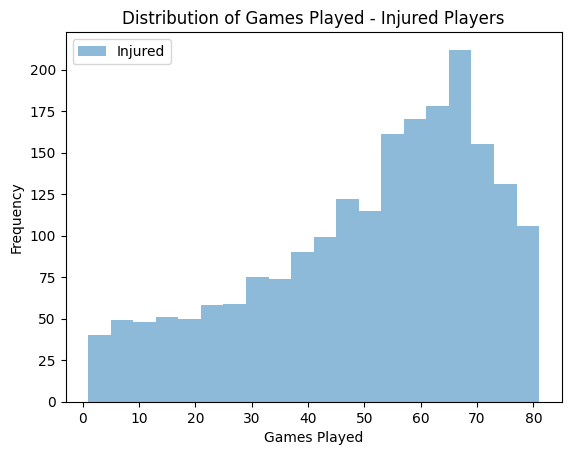

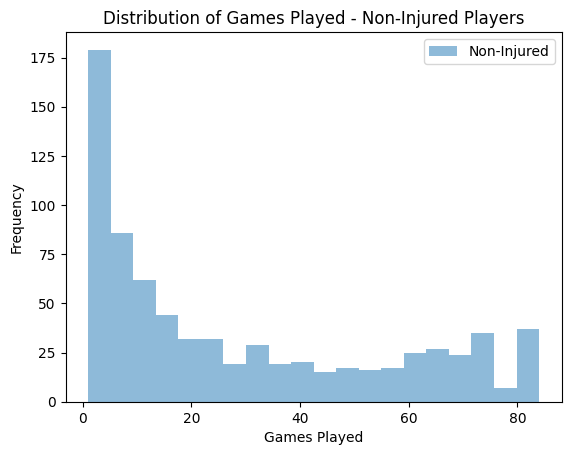

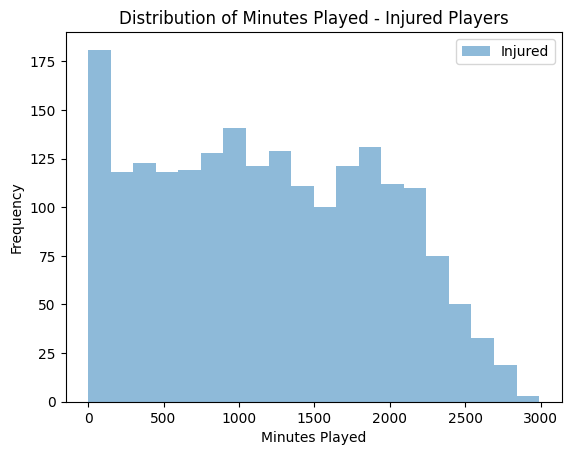

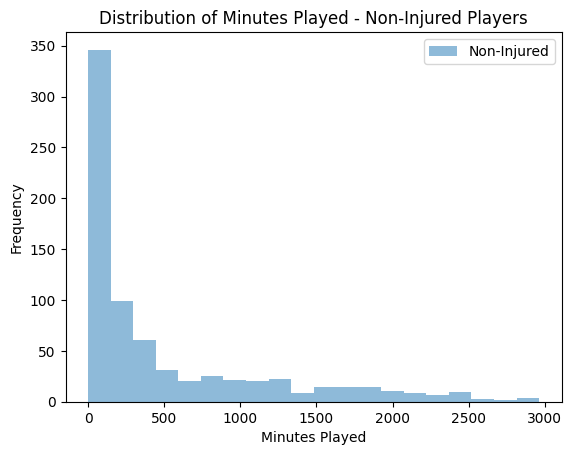

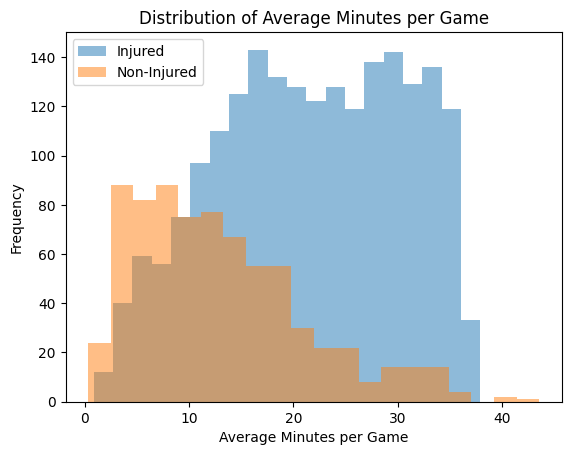

In [ ]:


# Assume your DataFrame is already loaded as 'df'
# For this example, we assume that if a season has a recorded injury,
# then "Games Missed" > 0, and if no injury is recorded, "Games Missed" is 0.

# Split the DataFrame into two groups: Injured vs. Non-Injured
injured = df[df["Games Missed"] > 0]
non_injured = df[df["Games Missed"] == 0]

########################################
# 1. Descriptive Statistics & Distribution Analysis
########################################

# Print descriptive statistics for selected performance metrics.
performance_metrics = ["GP", "MIN", "PTS"]  # you can choose other metrics too

print("Descriptive statistics for injured players:")
print(injured[performance_metrics].describe(), "\n")

print("Descriptive statistics for non-injured players:")
print(non_injured[performance_metrics].describe(), "\n")

# Plot histograms for Games Played (GP)
plt.figure()
plt.hist(injured["GP"].dropna(), bins=20, alpha=0.5, label="Injured")
plt.xlabel("Games Played")
plt.ylabel("Frequency")
plt.title("Distribution of Games Played - Injured Players")
plt.legend()
plt.show()

plt.figure()
plt.hist(non_injured["GP"].dropna(), bins=20, alpha=0.5, label="Non-Injured")
plt.xlabel("Games Played")
plt.ylabel("Frequency")
plt.title("Distribution of Games Played - Non-Injured Players")
plt.legend()
plt.show()

# Similarly, plot histograms for Minutes Played (MIN)
plt.figure()
plt.hist(injured["MIN"].dropna(), bins=20, alpha=0.5, label="Injured")
plt.xlabel("Minutes Played")
plt.ylabel("Frequency")
plt.title("Distribution of Minutes Played - Injured Players")
plt.legend()
plt.show()

plt.figure()
plt.hist(non_injured["MIN"].dropna(), bins=20, alpha=0.5, label="Non-Injured")
plt.xlabel("Minutes Played")
plt.ylabel("Frequency")
plt.title("Distribution of Minutes Played - Non-Injured Players")
plt.legend()
plt.show()


injured_avg_min = injured["MIN"] / injured["GP"]
non_injured_avg_min = non_injured["MIN"] / non_injured["GP"]

plt.figure()
plt.hist(injured_avg_min.dropna(), bins=20, alpha=0.5, label="Injured")
plt.hist(non_injured_avg_min.dropna(), bins=20, alpha=0.5, label="Non-Injured")
plt.xlabel("Average Minutes per Game")
plt.ylabel("Frequency")
plt.title("Distribution of Average Minutes per Game")
plt.legend()
plt.show()

Minutes per game cutoff (20th percentile): 10.082688888888889


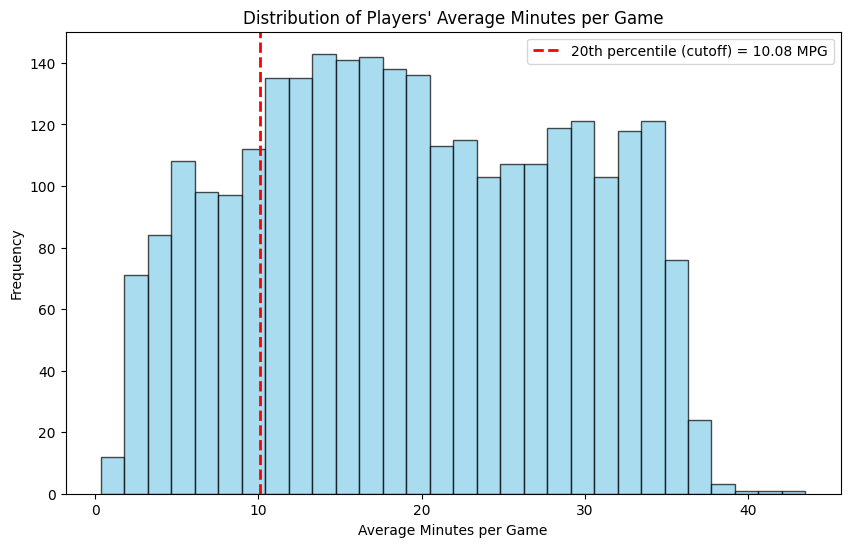

In [ ]:


# Compute average minutes per game for all players.
# (Assuming GP is nonzero for all rows.)
avg_min = df["MIN"] / df["GP"]

# Calculate the cutoff so that the bottom 20% of players fall below it,
# and the top 80% are above it.
cutoff = avg_min.quantile(0.2)
print("Minutes per game cutoff (20th percentile):", cutoff)

# Plot the distribution of all players' average minutes per game.
plt.figure(figsize=(10,6))
plt.hist(avg_min.dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel("Average Minutes per Game")
plt.ylabel("Frequency")
plt.title("Distribution of Players' Average Minutes per Game")

# Add a vertical line at the cutoff.
plt.axvline(cutoff, color='red', linestyle='dashed', linewidth=2, 
            label=f"20th percentile (cutoff) = {cutoff:.2f} MPG")
plt.legend()
plt.show()

In [39]:
########################################
# 3. Statistical Testing
########################################

# Example: Perform a t-test comparing Minutes Played (MIN) between injured and non-injured groups.
# (We drop any missing values in the metric.)
t_stat_min, p_value_min = ttest_ind(injured["MIN"].dropna(), non_injured["MIN"].dropna(), equal_var=False)
print(f"T-test for Minutes Played (MIN): t-statistic = {t_stat_min:.3f}, p-value = {p_value_min:.3f}")

# You can also perform a t-test on another performance metric, for example Games Played (GP).
t_stat_gp, p_value_gp = ttest_ind(injured["GP"].dropna(), non_injured["GP"].dropna(), equal_var=False)
print(f"T-test for Games Played (GP): t-statistic = {t_stat_gp:.3f}, p-value = {p_value_gp:.3f}")

T-test for Minutes Played (MIN): t-statistic = 23.358, p-value = 0.000
T-test for Games Played (GP): t-statistic = 20.099, p-value = 0.000


# Features to Explore:

1. Total Minutes
2. Average Minutes per Game
3. Age
4. Height and Weight, transform to Body mass index
5. EXP
6. Position

Advance:
3. USG_PCT (usage percentage) 
4. Poss
5. OFF_RATING, DEF_RATING, NET_RATING
6. PIE (Player Impact Estimate)
7. TS_PCT (True Shooting Percentage)
8. 



# NBA Player Stats Column Definitions

| Column | Definition |
|--------|------------|
| `PLAYER_ID` | Unique identifier for the player. |
| `PLAYER_NAME` | Full name of the player. |
| `NICKNAME` | Nickname of the player (often empty or not used). |
| `TEAM_ID` | Unique identifier for the team. |
| `TEAM_ABBREVIATION` | Short abbreviation of the team name (e.g., LAL for Lakers). |
| `AGE` | Player’s age during the season. |
| `GP` | Games played by the player. |
| `W` | Number of games won when the player participated. |
| `L` | Number of games lost when the player participated. |
| `W_PCT` | Win percentage when the player was active (`W / GP`). |
| `MIN` | Average minutes played per game. |
| `FGM` | Field goals made per game. |
| `FGA` | Field goals attempted per game. |
| `FG_PCT` | Field goal percentage (`FGM / FGA`). |
| `FG3M` | Three-point field goals made per game. |
| `FG3A` | Three-point field goals attempted per game. |
| `FG3_PCT` | Three-point field goal percentage (`FG3M / FG3A`). |
| `FTM` | Free throws made per game. |
| `FTA` | Free throws attempted per game. |
| `FT_PCT` | Free throw percentage (`FTM / FTA`). |
| `OREB` | Offensive rebounds per game. |
| `DREB` | Defensive rebounds per game. |
| `REB` | Total rebounds per game (`OREB + DREB`). |
| `AST` | Assists per game. |
| `TOV` | Turnovers per game. |
| `STL` | Steals per game. |
| `BLK` | Blocks per game. |
| `BLKA` | Blocks against (how many times the player's shot was blocked). |
| `PF` | Personal fouls committed per game. |
| `PFD` | Personal fouls drawn per game (fouls suffered by the player). |
| `PTS` | Points per game. |
| `PLUS_MINUS` | Player’s net impact on the scoreboard (`team points - opponent points`) while they are on the court. |
| `NBA_FANTASY_PTS` | Fantasy points based on standard NBA fantasy scoring systems. |
| `DD2` | Number of double-doubles (when a player records 10+ in two statistical categories). |
| `TD3` | Number of triple-doubles (when a player records 10+ in three statistical categories). |
| `WNBA_FANTASY_PTS` | Likely a placeholder, as this dataset is NBA-only. |
| `GP_RANK` | Rank among all players for games played. |
| `W_RANK` | Rank among all players for wins. |
| `L_RANK` | Rank among all players for losses. |
| `W_PCT_RANK` | Rank among all players for win percentage. |
| `MIN_RANK` | Rank among all players for minutes played. |
| `FGM_RANK` | Rank among all players for field goals made. |
| `FGA_RANK` | Rank among all players for field goals attempted. |
| `FG_PCT_RANK` | Rank among all players for field goal percentage. |
| `FG3M_RANK` | Rank among all players for three-point field goals made. |
| `FG3A_RANK` | Rank among all players for three-point field goals attempted. |
| `FG3_PCT_RANK` | Rank among all players for three-point percentage. |
| `FTM_RANK` | Rank among all players for free throws made. |
| `FTA_RANK` | Rank among all players for free throws attempted. |
| `FT_PCT_RANK` | Rank among all players for free throw percentage. |
| `OREB_RANK` | Rank among all players for offensive rebounds. |
| `DREB_RANK` | Rank among all players for defensive rebounds. |
| `REB_RANK` | Rank among all players for total rebounds. |
| `AST_RANK` | Rank among all players for assists. |
| `TOV_RANK` | Rank among all players for turnovers. |
| `STL_RANK` | Rank among all players for steals. |
| `BLK_RANK` | Rank among all players for blocks. |
| `BLKA_RANK` | Rank among all players for blocked attempts. |
| `PF_RANK` | Rank among all players for personal fouls committed. |
| `PFD_RANK` | Rank among all players for personal fouls drawn. |
| `PTS_RANK` | Rank among all players for points scored. |
| `PLUS_MINUS_RANK` | Rank among all players for plus/minus impact. |
| `NBA_FANTASY_PTS_RANK` | Rank among all players for fantasy points. |
| `DD2_RANK` | Rank among all players for double-doubles. |
| `TD3_RANK` | Rank among all players for triple-doubles. |
| `WNBA_FANTASY_PTS_RANK` | Placeholder for WNBA stats (likely unused in this dataset). |
| `Season Type` | Type of season (`Regular Season`, `Playoffs`, etc.). |

## 📊 Undocumented NBA Stats Column Definitions

| Column | Definition |
|--------|------------|
| `E_OFF_RATING` | Estimated Offensive Rating: A version of offensive rating that estimates points produced per 100 possessions using adjusted metrics. |
| `OFF_RATING` | Offensive Rating: Points produced per 100 possessions while the player is on the court. |
| `sp_work_OFF_RATING` | A special/internal calculation of offensive rating used in SportsVu or internal tools—typically close to OFF_RATING. Often for testing/validation. |
| `E_DEF_RATING` | Estimated Defensive Rating: An estimate of points allowed per 100 possessions using adjusted formulas. |
| `DEF_RATING` | Defensive Rating: Points allowed per 100 possessions while the player is on the court. |
| `sp_work_DEF_RATING` | Internal variant of DEF_RATING based on tracking data. |
| `E_NET_RATING` | Estimated Net Rating: The difference between `E_OFF_RATING` and `E_DEF_RATING`. |
| `NET_RATING` | Net Rating: The difference between `OFF_RATING` and `DEF_RATING`. Higher = better. |
| `sp_work_NET_RATING` | Internal net rating calculation using `sp_work_` stats. |
| `AST_PCT` | Assist Percentage: % of teammate field goals assisted by the player while on the court. |
| `AST_TO` | Assist-to-Turnover Ratio: Assists divided by turnovers (`AST / TOV`). |
| `AST_RATIO` | Assist Ratio: Assists per 100 possessions. |
| `OREB_PCT` | Offensive Rebound Percentage: % of available offensive rebounds grabbed. |
| `DREB_PCT` | Defensive Rebound Percentage: % of available defensive rebounds grabbed. |
| `REB_PCT` | Total Rebound Percentage: % of available rebounds (offensive + defensive) grabbed. |
| `TM_TOV_PCT` | Team Turnover Percentage: Estimate of turnovers committed per 100 team possessions while the player is on the court. |
| `E_TOV_PCT` | Estimated Turnover Percentage: Estimate of player’s turnover rate using adjusted methods. |
| `EFG_PCT` | Effective Field Goal Percentage: Adjusts FG% to account for 3-point shots being worth more (`(FGM + 0.5 * 3PM) / FGA`). |
| `TS_PCT` | True Shooting Percentage: Shooting efficiency including FG, 3PT, and FT (`PTS / (2 * (FGA + 0.44 * FTA))`). |
| `USG_PCT` | Usage Percentage: % of team plays used by the player while on court. | Basically, How often is this guy finishing the play when he’s out there?”
| `E_USG_PCT` | Estimated Usage Percentage: Adjusted version of USG_PCT, possibly using tracking data. |
| `E_PACE` | Estimated Pace: Estimate of possessions per 48 minutes, team-adjusted. |
| `PACE` | Team Pace: Estimate of possessions per 48 minutes while the player is on the court. |
| `PACE_PER40` | Projected possessions per 40 minutes, used for comparative purposes. |
| `sp_work_PACE` | Internal pace metric, often based on player tracking systems. |
| `PIE` | Player Impact Estimate: NBA's holistic player impact metric showing overall contribution to team success. |
| `POSS` | Estimated number of possessions the player was on the floor for. Estimated Possessions = FGA + (0.44 × FTA) - ORB + TO  Possessions measure how often a team or player is involved in plays| 
| `FGM_PG` | Field Goals Made per Game. |
| `FGA_PG` | Field Goals Attempted per Game. |
| `_RANK` Columns (e.g., `AST_PCT_RANK`) | Rank of the player in that metric compared to other players in the dataset. |

| Feature Name      | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| `HEIGHT`          | Player's height, usually in feet-inches format (e.g., "6-7").                |
| `WEIGHT`          | Player's weight in pounds.                                                   |
| `POSITION`        | Player’s official NBA position (e.g., "G", "F", "C", "G-F", etc.).           |
| `AGE`             | Age of the player during the season.                                         |
| `EXP`             | Years of NBA experience (0 = rookie).                                        |